In [12]:
import pandas as pd
import pickle,os, copy
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import sys
sys.path.append(".")


import re

from nn_generalizability.nets import Nets
from nn_generalizability.utils import *
from nn_generalizability.postprocessing.postprocessing import *
from nn_generalizability.postprocessing.stats_plotting import *
from nn_generalizability.postprocessing.GA import *
from nn_generalizability.save_load import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
root_folder = os.environ["PATH_TO_GEN_FOLDER"]
data_name = "CIFAR10"
exp = "Jul13_16-26-18_Daniels-MacBook-Pro-4.local"
experiment_folder = os.path.join(root_folder, "experiments", data_name, exp)

In [20]:
# get all sorts of data
exp_dict = {}

def get_stuff(experiment_folder):
    stuff = {}

    stuff_to_try = ["tsne", "runs", "trace", "acc", "dist", "loss", "grad", "eig"]

    for singular_stuff in stuff_to_try:
        print("Getting {}.".format(singular_stuff))
        data, meta = load_cached_data(experiment_folder, singular_stuff)
        if data is None:
            print("Error: {} could not be found".format(singular_stuff))
        else:
            stuff[singular_stuff] = data
    
    stuff["configs"] = get_configs(experiment_folder)
    
    return stuff

exp_dict["stuff"] = get_stuff(experiment_folder)
exp_dict["models"] = get_all_models(experiment_folder, -1)
exp_dict["resampling_idxs"] = get_sample_idxs(experiment_folder)

Getting tsne.
Error: tsne could not be found
Getting runs.
Getting trace.
Getting acc.
Getting dist.
Error: dist could not be found
Getting loss.
Getting grad.
Error: grad could not be found
Getting eig.
Error: eig could not be found


In [21]:
stats_df = get_end_stats(exp_dict)


Error: No stats for 1594650391.1231968


In [22]:
# stats_df = stats_df[stats_df["Acc Test Mean"] > 0.15]
stats_df.sort_values(by="Acc Test Max", ascending=False)

,Acc Test Max,Acc Test Mean,Acc Test Min,Acc Train Max,Acc Train Mean,Acc Train Min,Gap Mean,Loss Test Max,Loss Test Mean,Loss Test Min,Loss Train Max,Loss Train Mean,Loss Train Min,Trace Max,Trace Mean,Trace Mean Std,Trace Min
1594650391.1231968,0.3248,0.3087,0.2926,0.3196,0.3068,0.294,0.0019,1.975818,1.924627,1.873436,1.977696,1.925576,1.873457,112.180662,101.793065,33.855087,91.405467


In [265]:
exp_ids = ["1593839018.0483027", "1593837248.7753067"]
exp_ids = ["1593839018.0483027",]

In [23]:

# pre_filtered_idxs = stats_df[(stats_df["softmax_beta"] >= 500) | (stats_df["softmax_beta"] <= -500 )].index
# pre_filtered_exp_dict = {i: exp_dict[i] for i in pre_filtered_idxs}

plot_special(exp_dict, "time", "Trace", 
             filter_seperate=[], filter_not_seperate=["softmax_beta"],
             save_exp_path=None, X_axis_bounds=[0, 6000], Y_axis_bounds=None,
            pre_filtered_exp_ids=None, is_mean=True)


KeyError: 'runs'

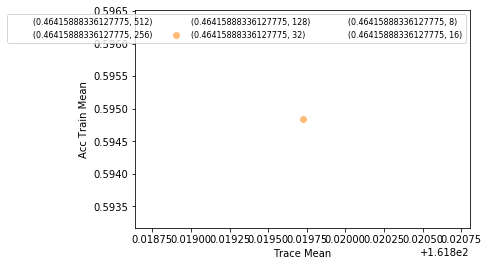

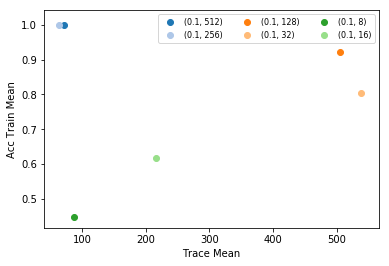

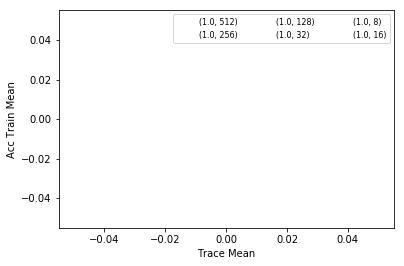

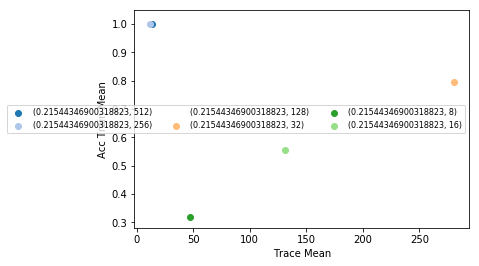

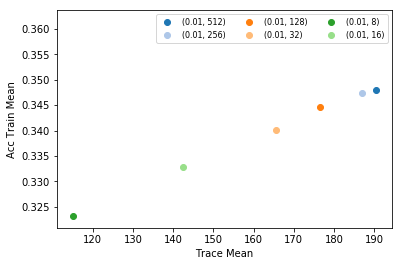

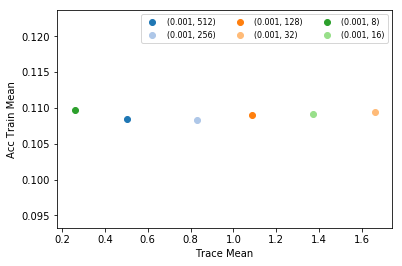

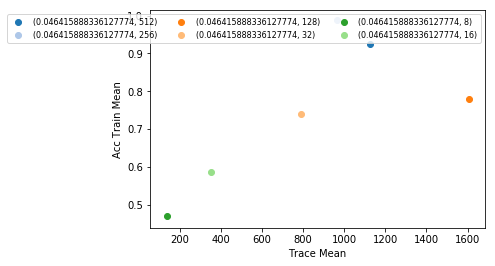

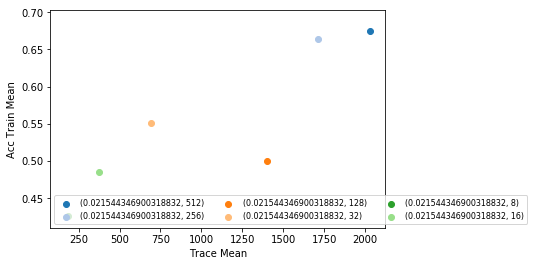

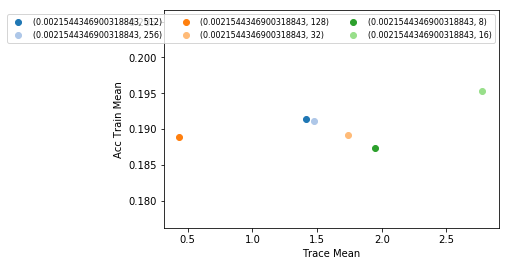

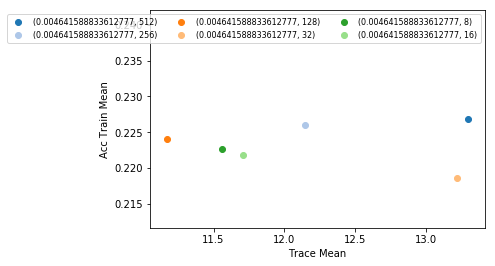

In [181]:
plot_stats(stats_df,  "Trace Mean", "Acc Train Mean",  
           filter_seperate=["learning_rate", ], filter_not_seperate=["batch_train_size"], 
           X_axis_bounds=None, Y_axis_bounds=None,
          X_axis_display_name=None, Y_axis_display_name=None, 
          save_exp_path=None)

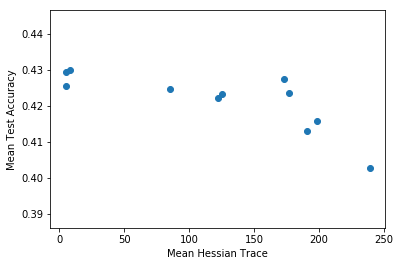

In [113]:
plot_stats(stats_df,  "Trace Mean", "Acc Test Mean",  
           filter_seperate=[], filter_not_seperate=[], 
           X_axis_bounds=None, Y_axis_bounds=None,
          X_axis_display_name="Mean Hessian Trace", Y_axis_display_name="Mean Test Accuracy", 
          save_exp_path=experiment_folder)

Correlation for () trace:all/acc test: nan


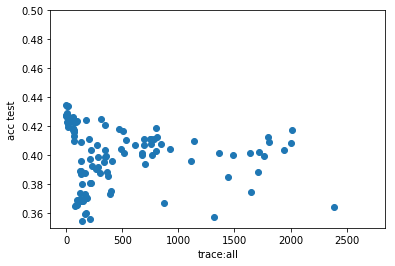

In [261]:
# pre_filtered_idxs = stats_df[(stats_df["softmax_beta"] >= 500) | (stats_df["softmax_beta"] <= -500 )].index
# pre_filtered_exp_dict = {i: exp_dict[i] for i in pre_filtered_idxs}

plot_special(exp_dict, "trace:all", "acc test", 
             filter_seperate=[], filter_not_seperate=[],
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=[0.35, 0.5],
            pre_filtered_exp_ids=None, is_mean=False)


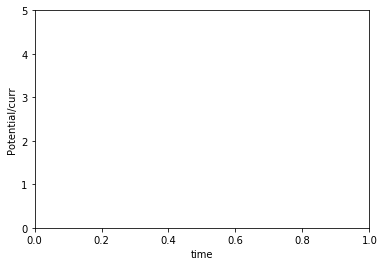

In [293]:

# pre_filtered_idxs = stats_df[(stats_df["softmax_beta"] >= 500) | (stats_df["softmax_beta"] <= -500 )].index
# pre_filtered_exp_dict = {i: exp_dict[i] for i in pre_filtered_idxs}

plot_special(exp_dict, "time", "Potential/curr", 
             filter_seperate=[], filter_not_seperate=[],
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=[0, 5],
            pre_filtered_exp_ids=["1593844222.636462", ], is_mean=False)


Correlation for () trace:all/acc train: nan


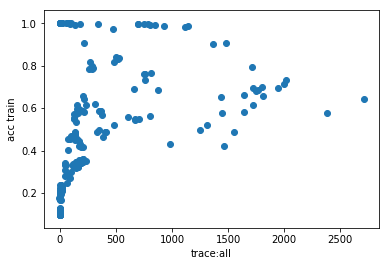

In [194]:
plot_special(exp_dict, "trace:all", 
             "acc train", filter_seperate=[], filter_not_seperate=[],
             pre_filtered_exp_ids=None,
             save_exp_path=None, X_axis_bounds=None, Y_axis_bounds=None,
        X_axis_display_name=None, Y_axis_display_name=None, 
)


Correlation for (0,) softmax_beta/gap acc:all: nan
Correlation for (1.0,) softmax_beta/gap acc:all: nan
Correlation for (100.0,) softmax_beta/gap acc:all: nan
Correlation for (-25.75,) softmax_beta/gap acc:all: nan
Correlation for (75.25,) softmax_beta/gap acc:all: nan
Correlation for (-50.5,) softmax_beta/gap acc:all: nan
Correlation for (50.5,) softmax_beta/gap acc:all: nan
Correlation for (-75.25,) softmax_beta/gap acc:all: nan
Correlation for (25.75,) softmax_beta/gap acc:all: nan
Correlation for (-100.0,) softmax_beta/gap acc:all: nan
Correlation for (-1.0,) softmax_beta/gap acc:all: nan


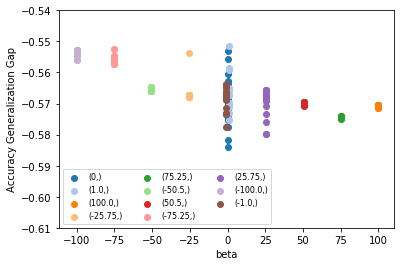

In [110]:
plot_special(exp_dict, "softmax_beta", 
             "gap acc:all", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=[-0.61, -0.54],
            X_axis_display_name="beta", Y_axis_display_name="Accuracy Generalization Gap", )

(1, 6000, 20)
Correlation for (0,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (1.0,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (100.0,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (-25.75,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (75.25,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (-50.5,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (50.5,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (-75.25,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (25.75,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (-100.0,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (-1.0,) softmax_beta/path:all: nan


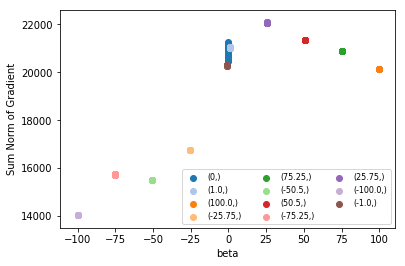

In [95]:
plot_special(exp_dict, "softmax_beta", 
             "path:all", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=None,
        X_axis_display_name="beta", Y_axis_display_name="Sum Norm of Gradient", 
)

Correlation for (0,) softmax_beta/acc train:all: nan
Correlation for (1.0,) softmax_beta/acc train:all: nan
Correlation for (100.0,) softmax_beta/acc train:all: nan
Correlation for (-25.75,) softmax_beta/acc train:all: nan
Correlation for (75.25,) softmax_beta/acc train:all: nan
Correlation for (-50.5,) softmax_beta/acc train:all: nan
Correlation for (50.5,) softmax_beta/acc train:all: nan
Correlation for (-75.25,) softmax_beta/acc train:all: nan
Correlation for (25.75,) softmax_beta/acc train:all: nan
Correlation for (-100.0,) softmax_beta/acc train:all: nan
Correlation for (-1.0,) softmax_beta/acc train:all: nan


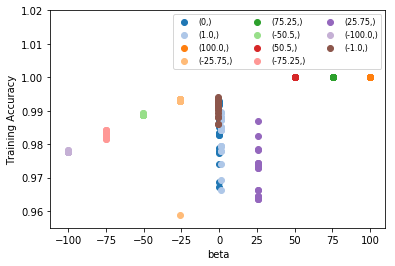

In [96]:
plot_special(exp_dict, "softmax_beta", 
             "acc train:all", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=[0.955, 1.02],
        X_axis_display_name="beta", Y_axis_display_name="Training Accuracy", 
)

Correlation for (0,) softmax_beta/loss train:all: nan
Correlation for (1.0,) softmax_beta/loss train:all: nan
Correlation for (100.0,) softmax_beta/loss train:all: nan
Correlation for (-25.75,) softmax_beta/loss train:all: nan
Correlation for (75.25,) softmax_beta/loss train:all: nan
Correlation for (-50.5,) softmax_beta/loss train:all: nan
Correlation for (50.5,) softmax_beta/loss train:all: nan
Correlation for (-75.25,) softmax_beta/loss train:all: nan
Correlation for (25.75,) softmax_beta/loss train:all: nan
Correlation for (-100.0,) softmax_beta/loss train:all: nan
Correlation for (-1.0,) softmax_beta/loss train:all: nan


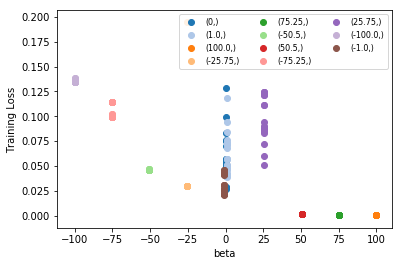

In [97]:
plot_special(exp_dict, "softmax_beta", 
             "loss train:all", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=None,
        X_axis_display_name="beta", Y_axis_display_name="Training Loss", 
)

Correlation for (0,) softmax_beta/acc test:all: nan
Correlation for (1.0,) softmax_beta/acc test:all: nan
Correlation for (100.0,) softmax_beta/acc test:all: nan
Correlation for (-25.75,) softmax_beta/acc test:all: nan
Correlation for (75.25,) softmax_beta/acc test:all: nan
Correlation for (-50.5,) softmax_beta/acc test:all: nan
Correlation for (50.5,) softmax_beta/acc test:all: nan
Correlation for (-75.25,) softmax_beta/acc test:all: nan
Correlation for (25.75,) softmax_beta/acc test:all: nan
Correlation for (-100.0,) softmax_beta/acc test:all: nan
Correlation for (-1.0,) softmax_beta/acc test:all: nan


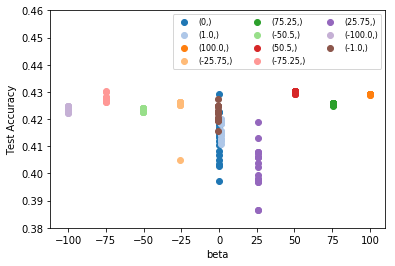

In [104]:
plot_special(exp_dict, "softmax_beta", 
             "acc test:all", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=[0.38, 0.46],
        X_axis_display_name="beta", Y_axis_display_name="Test Accuracy", 
)

Correlation for (0,) loss train/acc test:all: -0.40866750442481103
Correlation for (1.0,) loss train/acc test:all: -0.5978731056015376
Correlation for (100.0,) loss train/acc test:all: 0.19243212525638764
Correlation for (-25.75,) loss train/acc test:all: -0.9960784970221818
Correlation for (75.25,) loss train/acc test:all: -0.021527326263153436
Correlation for (-50.5,) loss train/acc test:all: -0.4894343283628214
Correlation for (50.5,) loss train/acc test:all: -0.3958594536588277
Correlation for (-75.25,) loss train/acc test:all: -0.2710242180561301
Correlation for (25.75,) loss train/acc test:all: -0.7982509696353021
Correlation for (-100.0,) loss train/acc test:all: 0.18884045375781974
Correlation for (-1.0,) loss train/acc test:all: -0.04123841478380125


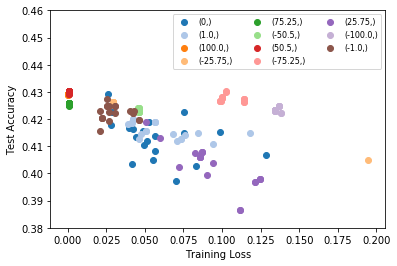

In [105]:
plot_special(exp_dict, "loss train", 
             "acc test:all", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=[0.38, 0.46],
        X_axis_display_name="Training Loss", Y_axis_display_name="Test Accuracy", 
)

Correlation for (0,) trace:all/acc test: -0.6274072622075092
Correlation for (1.0,) trace:all/acc test: -0.7280681453231365
Correlation for (100.0,) trace:all/acc test: 0.055579233589157215
Correlation for (-25.75,) trace:all/acc test: -0.9969278362918722
Correlation for (75.25,) trace:all/acc test: -0.004681376872029825
Correlation for (-50.5,) trace:all/acc test: 0.3939103472164226
Correlation for (50.5,) trace:all/acc test: 0.29454299268777145
Correlation for (-75.25,) trace:all/acc test: -0.01721736154139564
Correlation for (25.75,) trace:all/acc test: -0.8798912692609473
Correlation for (-100.0,) trace:all/acc test: -0.7878147467574756
Correlation for (-1.0,) trace:all/acc test: -0.2766072132615946


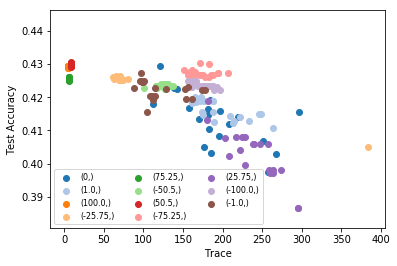

In [100]:
plot_special(exp_dict, "trace:all", 
             "acc test", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=None,
        X_axis_display_name="Trace", Y_axis_display_name="Test Accuracy", 
)


Correlation for (0,) trace:all/acc train: -0.810550262197468
Correlation for (1.0,) trace:all/acc train: -0.9468601583574487
Correlation for (100.0,) trace:all/acc train: nan
Correlation for (-25.75,) trace:all/acc train: -0.998768363219076
Correlation for (75.25,) trace:all/acc train: nan
Correlation for (-50.5,) trace:all/acc train: 0.549033992542039
Correlation for (50.5,) trace:all/acc train: nan
Correlation for (-75.25,) trace:all/acc train: -0.8039867160343224
Correlation for (25.75,) trace:all/acc train: -0.8931043173320938
Correlation for (-100.0,) trace:all/acc train: 0.4760686005935041
Correlation for (-1.0,) trace:all/acc train: -0.8307868317886303


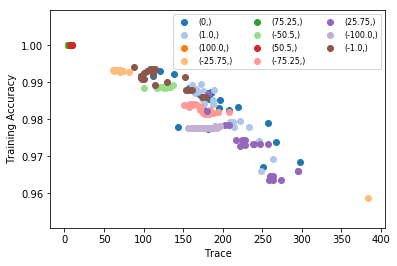

In [101]:
plot_special(exp_dict, "trace:all", 
             "acc train", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=None,
        X_axis_display_name="Trace", Y_axis_display_name="Training Accuracy", 
)


Correlation for (0,) trace:all/loss train: 0.7538199515826485
Correlation for (1.0,) trace:all/loss train: 0.9311195003930683
Correlation for (100.0,) trace:all/loss train: 0.1566573168278865
Correlation for (-25.75,) trace:all/loss train: 0.9982372246282047
Correlation for (75.25,) trace:all/loss train: 0.03831370945781648
Correlation for (-50.5,) trace:all/loss train: -0.6245568716353364
Correlation for (50.5,) trace:all/loss train: -0.2097382917007546
Correlation for (-75.25,) trace:all/loss train: 0.8250583603592739
Correlation for (25.75,) trace:all/loss train: 0.8405368236049426
Correlation for (-100.0,) trace:all/loss train: -0.10610345163847848
Correlation for (-1.0,) trace:all/loss train: 0.7818162745305057


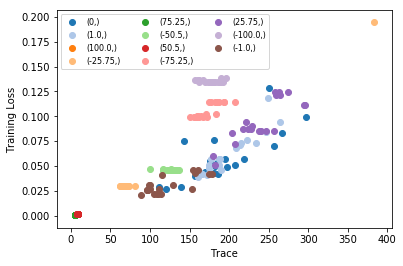

In [102]:
plot_special(exp_dict, "trace:all", 
             "loss train", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=None,
        X_axis_display_name="Trace", Y_axis_display_name="Training Loss", 
)


Correlation for (0,) softmax_beta/trace:all: nan
Correlation for (1.0,) softmax_beta/trace:all: nan
Correlation for (100.0,) softmax_beta/trace:all: nan
Correlation for (-25.75,) softmax_beta/trace:all: nan
Correlation for (75.25,) softmax_beta/trace:all: nan
Correlation for (-50.5,) softmax_beta/trace:all: nan
Correlation for (50.5,) softmax_beta/trace:all: nan
Correlation for (-75.25,) softmax_beta/trace:all: nan
Correlation for (25.75,) softmax_beta/trace:all: nan
Correlation for (-100.0,) softmax_beta/trace:all: nan
Correlation for (-1.0,) softmax_beta/trace:all: nan


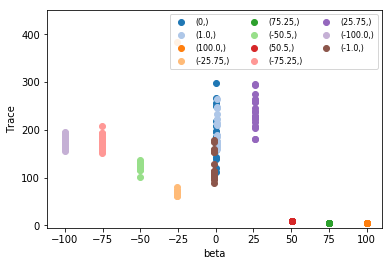

In [108]:
plot_special(exp_dict, "softmax_beta", 
             "trace:all", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=[-5, 450],
            X_axis_display_name="beta", Y_axis_display_name="Trace", )

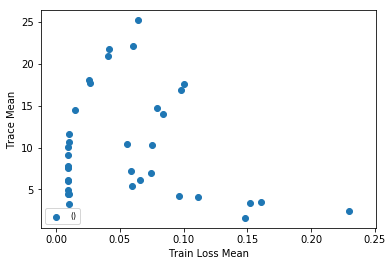

In [42]:

      
plot_stats(stats_df,  "Train Loss Mean", "Trace Mean",filter_by=[], seperate=True)



In [196]:
x=  np.random.normal(scale=1, size=(1000, 2))
y = 1 * (x[:, 0] >= 0)
ct = 0
def flip(val, alpha):
    should_flip = np.random.uniform(0, 1)<alpha
    global ct
    if should_flip:
        ct += 1
        if val == 0:
            val = 1
        elif val == 1:
            val = 0
    return val
y = [flip(a, 0.05) for a in y]
x += np.random.normal(scale=0.15, size=x.shape)

In [197]:
c = 0
for a, b in zip(x, y):
    if (a[0] < 0) and (b == 1):
        c+=1
    elif (a[0] > 0) and (b == 0):
        c+=1 